# Análises sobre os tokens
Análise sobre os dados da camada refined:
*   Contagem de palavras
*   Palavras mais frequentes
*   Palavras mais frequentes aos pares
*   Bigramas e Trigamas mais frequentes
*   Nuvem de palavras




### Leitura da tabela dlzd_olist_order_reviews_clean

In [64]:
import pandas as pd
import itertools
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
nltk.download('punkt')

In [73]:
import pandas as pd
df_reviews = pd.read_parquet('../dataset/delivery/dlzd_olist_order_reviews_clean.parquet.snappy')

## Contagem de palavras

In [74]:
word_counts = Counter([token for sublist in df_reviews['review_comment_title_and_message'] for token in sublist])

total_words = sum(word_counts.values())
unique_words = len(word_counts)
words_least_than_3 = {word: count for word, count in word_counts.items() if count <= 3}
words_more_than_3 = {word: count for word, count in word_counts.items() if count > 3}

# diversidade lexical -> proximo de 1 indica muita variação
lexical_diversity = unique_words / total_words

print(f"Total de palavras: {total_words}")
print(f"Total de palavras únicas: {unique_words}")
print(f"Total de palavras que aparecem até 3 vezes: {len(words_least_than_3)}")
print(f"Total de palavras que ocorrem mais de 3 vezes: {len(words_more_than_3)}")
print(f"Diversidade lexical: {lexical_diversity:.4f}")

Total de palavras: 121813
Total de palavras únicas: 10602
Total de palavras que aparecem até 3 vezes: 7817
Total de palavras que ocorrem mais de 3 vezes: 2785
Diversidade lexical: 0.0870


## Contagem das 20 palavras mais frequentes

Removendo palavras que não agregam contexto

In [75]:
words_to_remove = {'nao', 'ja', 'so',
                   'ate', 'recebi', 'veio', 'prazo', 'chegou', 'entregue', 'ok', 'pra', 'porem'}

df_reviews['review_comment_title_and_message'] = df_reviews['review_comment_title_and_message'].apply(
    lambda tokens: [word for word in tokens if word not in words_to_remove]
)

In [80]:
word_counts_clean = Counter([token for tokens_list in df_reviews['review_comment_title_and_message'] for token in tokens_list])

top_25_words_clean = word_counts_clean.most_common(25)
top_25_words_clean

[('produto', 8310),
 ('recomendo', 3380),
 ('otimo', 2261),
 ('qualidade', 1556),
 ('excelente', 1376),
 ('gostei', 1300),
 ('loja', 1250),
 ('comprei', 1123),
 ('compra', 1079),
 ('super', 1018),
 ('otima', 805),
 ('lannister', 634),
 ('site', 576),
 ('pedido', 549),
 ('comprar', 543),
 ('produtos', 515),
 ('adorei', 458),
 ('certo', 458),
 ('rapido', 457),
 ('nota', 453),
 ('perfeito', 447),
 ('atendimento', 436),
 ('parabens', 419),
 ('conforme', 407),
 ('lindo', 399)]

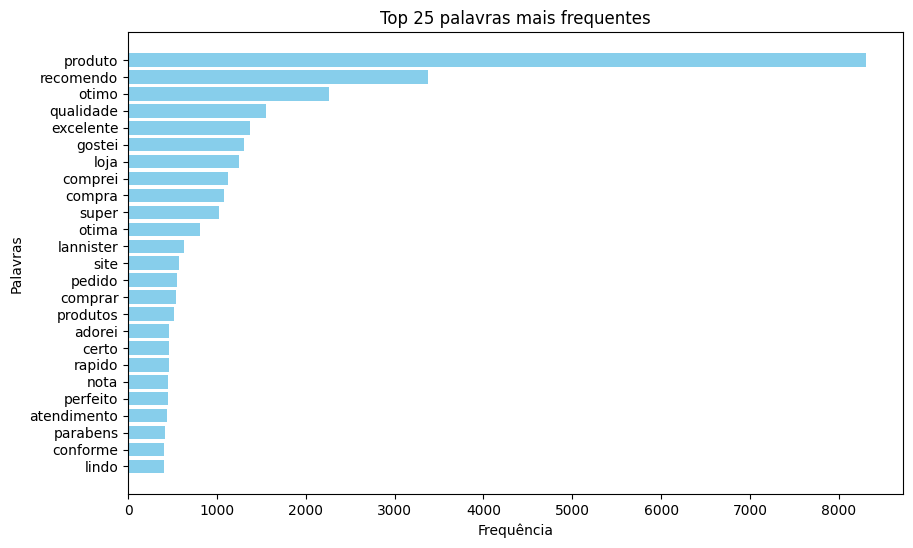

In [84]:
words, counts = zip(*top_25_words_clean)

plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Palavras')
plt.title('Top 25 palavras mais frequentes')
plt.gca().invert_yaxis()  # palavras mais frequentes no topo
plt.show()

## Análise ocorrencias em pares


In [67]:
pair_counts_clean = Counter()

for tokens in df_reviews['review_comment_title_and_message']:
    pairs = [tuple(sorted((a, b))) for a, b in itertools.combinations(tokens, 2) if a != b]
    pair_counts_clean.update(pairs)

In [68]:
top_25_pairs = pair_counts_clean.most_common(20)
top_25_pairs

[(('produto', 'qualidade'), 1179),
 (('produto', 'recomendo'), 1117),
 (('otimo', 'produto'), 865),
 (('recomendo', 'super'), 692),
 (('excelente', 'produto'), 586),
 (('loja', 'produto'), 579),
 (('comprei', 'produto'), 560),
 (('gostei', 'produto'), 526),
 (('compra', 'produto'), 440),
 (('otimo', 'recomendo'), 357),
 (('loja', 'recomendo'), 320),
 (('produto', 'site'), 305),
 (('otima', 'qualidade'), 295),
 (('defeito', 'produto'), 294),
 (('qualidade', 'recomendo'), 288),
 (('produto', 'super'), 278),
 (('diferente', 'produto'), 271),
 (('errado', 'produto'), 263),
 (('foto', 'produto'), 256),
 (('otima', 'produto'), 251)]

## Bigramas e Trigramas mais frequentes

In [71]:
# listas de palavras em uma única lista
all_tokens = list(itertools.chain(*df_reviews['review_comment_title_and_message']))

def extract_ngrams(tokens, n):
    ngrams = nltk.ngrams(tokens, n)
    return Counter(ngrams)

# contagem bigramas
bigrams = extract_ngrams(all_tokens, 2)
print("25 bigramas mais frequentes:")
for bigram, count in bigrams.most_common(25):
    print(f"{bigram}: {count} vezes")

# contagem trigramas
trigrams = extract_ngrams(all_tokens, 3)
print("\n25 trigramas mais frequentes:")
for trigram, count in trigrams.most_common(25):
    print(f"{trigram}: {count} vezes")

25 bigramas mais frequentes:
('otimo', 'produto'): 673 vezes
('super', 'recomendo'): 589 vezes
('recomendo', 'produto'): 556 vezes
('produto', 'produto'): 317 vezes
('gostei', 'produto'): 311 vezes
('produto', 'qualidade'): 308 vezes
('excelente', 'produto'): 297 vezes
('produto', 'recomendo'): 265 vezes
('otima', 'qualidade'): 263 vezes
('produto', 'excelente'): 263 vezes
('recomendo', 'otimo'): 237 vezes
('produto', 'otimo'): 227 vezes
('nota', 'fiscal'): 171 vezes
('qualidade', 'produto'): 168 vezes
('recomendo', 'loja'): 167 vezes
('recomendo', 'recomendo'): 167 vezes
('produto', 'defeito'): 160 vezes
('lojas', 'lannister'): 154 vezes
('produto', 'otima'): 147 vezes
('produto', 'conforme'): 144 vezes
('otimo', 'otimo'): 136 vezes
('produto', 'errado'): 133 vezes
('comprei', 'produto'): 123 vezes
('pessima', 'qualidade'): 123 vezes
('loja', 'produto'): 119 vezes

25 trigramas mais frequentes:
('produto', 'otima', 'qualidade'): 114 vezes
('super', 'recomendo', 'produto'): 103 vezes
(

## Nuvem de palavras

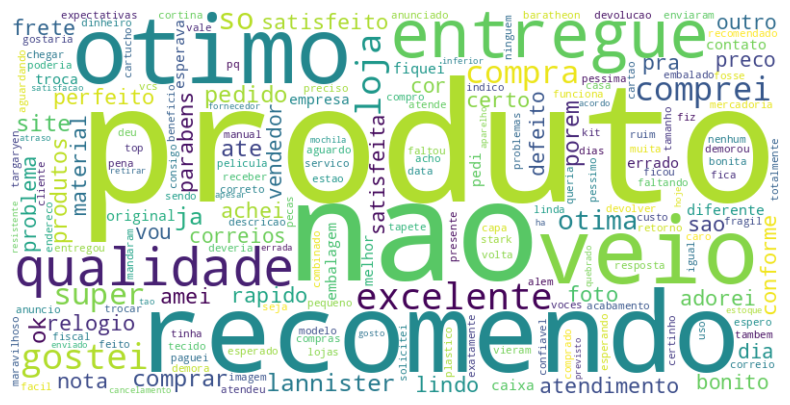

In [79]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()